In [47]:
#importing necessary libraries and data 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
url='sample_data.csv'
data=pd.read_csv(url)
data

,Unnamed: 0,date,time,date and time,open,high,low,close,volume
0,0,03/01/22,9:15 AM,03/01/22 9:15,252.70,254.25,252.35,252.60,319790
1,1,03/01/22,9:30 AM,03/01/22 9:30,252.60,253.65,251.75,252.80,220927
2,2,03/01/22,9:45 AM,03/01/22 9:45,252.95,254.90,252.30,252.85,526445
3,3,03/01/22,10:00 AM,03/01/22 10:00,252.85,253.15,252.40,252.55,280414
4,4,03/01/22,10:15 AM,2022-01-03 10:15:00,252.55,253.10,252.25,252.80,112875
...,...,...,...,...,...,...,...,...,...
1995,1995,29/04/22,2:15 PM,2022-04-29 14:15:00,336.85,337.95,334.35,337.05,687194
1996,1996,29/04/22,2:30 PM,2022-04-29 14:30:00,337.05,338.65,336.80,338.25,215018
1997,1997,29/04/22,2:45 PM,2022-04-29 14:45:00,338.00,338.80,337.10,338.05,155628
1998,1998,29/04/22,3:00 PM,2022-04-29 15:00:00,338.15,338.40,333.50,334.60,521086


In [62]:
!pip install yfinance
import yfinance

In [48]:
#dropping unnecessary column
data.drop(['Unnamed: 0'],axis=1, inplace=True)

In [49]:
#Basic description of the whole dataset
data.describe(include='all')

,date,time,date and time,open,high,low,close,volume
count,2000,2000,2000,2000.000000,2000.000000,2000.000000,2000.000000,2.000000e+03
unique,80,25,2000,NaN,NaN,NaN,NaN,NaN
top,25/01/22,12:00 PM,2022-01-10 10:00:00,NaN,NaN,NaN,NaN,NaN
freq,25,80,1,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,304.072050,305.112750,303.062375,304.087500,3.995450e+05
std,NaN,NaN,NaN,23.117987,23.129187,23.076869,23.100806,4.938786e+05
min,NaN,NaN,NaN,249.850000,250.150000,249.000000,249.800000,2.229300e+04
25%,NaN,NaN,NaN,293.187500,294.125000,292.112500,293.250000,1.471022e+05
50%,NaN,NaN,NaN,306.525000,307.975000,305.550000,306.675000,2.484240e+05
75%,NaN,NaN,NaN,321.700000,322.500000,320.700000,321.650000,4.841755e+05


<AxesSubplot:xlabel='date'>

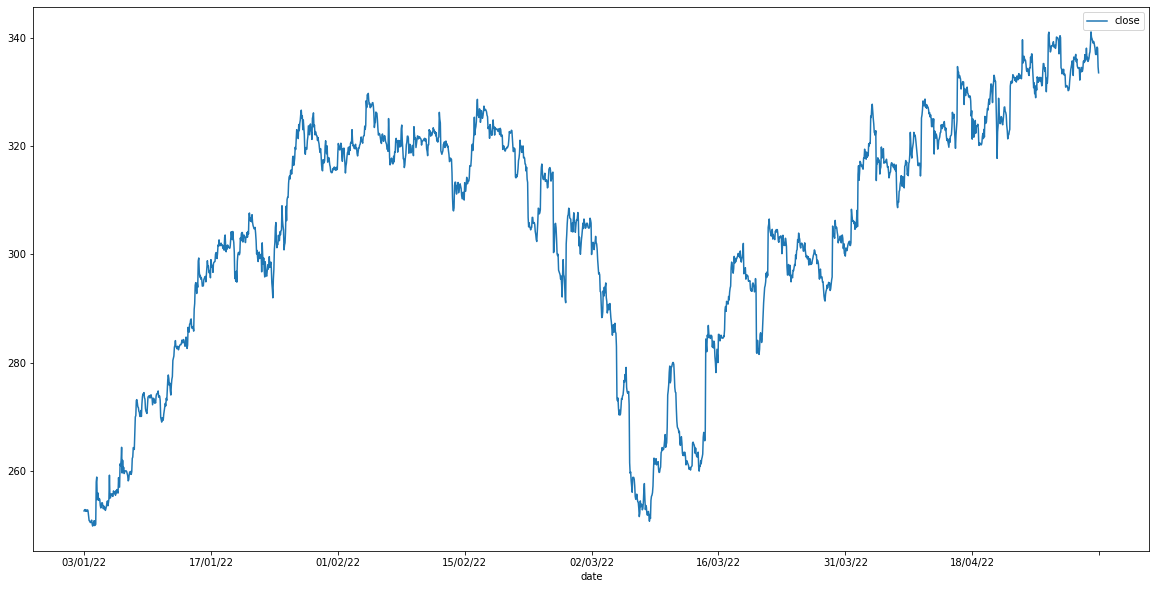

In [50]:
#plot of closing price for each day.
data.plot(x='date', y='close', figsize=(20,10))

Graph shows a steep decline in the closing price of the stock between 15/02/2022 and 10/03/2022,then a steady incease to present day,with the closing price being some of the highest

In [51]:
#calculating the daily returns or percentage change of closing price between each day
daily_returns = data['close'].pct_change(1).dropna()
daily_returns


1       0.000792
2       0.000198
3      -0.001186
4       0.000990
5      -0.000989
          ...   
1995    0.000594
1996    0.003560
1997   -0.000591
1998   -0.010206
1999   -0.003288
Name: close, Length: 1999, dtype: float64

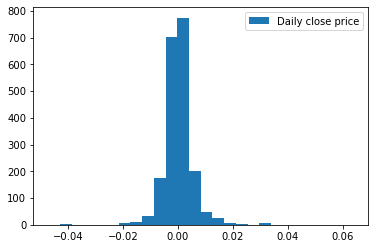

In [53]:
#histogram for probability distribution of returns
plt.hist(daily_returns,bins='rice',label="Daily close price")
plt.legend()
plt.show()

We can see it's just about centered around zero

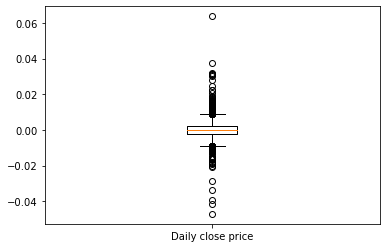

In [54]:
#creating a boxplot to see distribution of the dataset
plt.boxplot(daily_returns,labels=["Daily close price"])
plt.show()

since the IQR is small compared to the entire dataset we can see that there are a lot of outliers.


In [55]:
#other observations
np.mean(daily_returns)
#mean is close to zero but positive which is a good sign.

0.000154047334251948

In [56]:
np.std(daily_returns)
#standard deviation is close to zero but still higher than mean, this suggests that the stock is relaatively less risky.

0.005492962597543103

In [58]:
np.quantile(daily_returns, 0.5)
#since the median is close to the mean, the suggestion is that the distribution is symmetrical.

0.0